In [122]:
from bs4 import BeautifulSoup
import numpy as np
import copy
import re
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import PercentFormatter

In [2]:
url = "sosp_program.html"

with open(url) as fp:
    soup = BeautifulSoup(fp, 'html.parser')


In [97]:
# build a list of tuples, where each tuple is a <authors string, youtube video, [long youtube video]>
# (long is optional)
tuples = []
current_tuple = []

top_tr = soup.find_all("tr")
paper_block = False

for tr in top_tr:
    
    # if in a paper block, grab the author list,
    # add it to the tuple, and append the tuple to the list
    if paper_block:
        authorlist_td = tr.td
        current_tuple.insert(0,str(list(authorlist_td)[0]))
        tuples.append(copy.deepcopy(current_tuple))
        
        #clear current tuple
        current_tuple = []
        paper_block = False
    else: 
        all_span1 = tr.find_all("span")
        for span1 in all_span1:
            all_span2 = span1.find_all("span")
            for span2 in all_span2:
                all_a = span2.find_all("a")
                for a in all_a:
                    if "youtu.be" in str(a):
                        paper_block = True
                        current_tuple.append(str(a))

In [98]:
industry = ['Microsoft', 'Amazon', 'Facebook', 'Huawei', 'Nokia', 'VMware', 'Databricks', 'Google']

In [99]:
# build features: 
# fraction of industry authors, 
# number of videos
all_features = []
all_frac = []
all_numvid = []
for t in tuples:
    
    # first, get fraction of industry authors
    authors_string = t[0]
    affiliations_list = re.findall(r'\(.*?\)', authors_string)
    #print(affiliations_list)
    num_industry = len([a for a in affiliations_list if any(company in a for company in industry)])
    #print(num_industry)
    frac_industry_authors = num_industry/len(affiliations_list)
    all_frac.append(frac_industry_authors)
    
    # second, number of videos
    number_of_videos = 1
    if len(t) > 2:
        number_of_videos = 2
    
    all_numvid.append(number_of_videos)
    all_features.append((frac_industry_authors, number_of_videos))

Text(0.5, -0.02, 'Fraction of authors with industry affiliation')

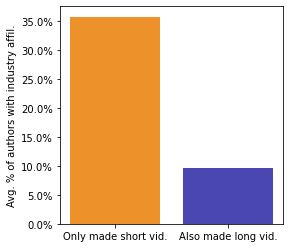

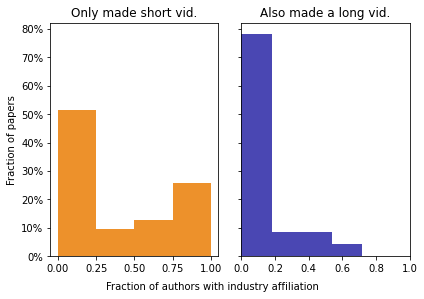

In [125]:
# Analysis
short_vid_fracs = [frac for (frac, num_vid) in all_features if num_vid == 1]
both_vids_fracs = [frac for (frac, num_vid) in all_features if num_vid == 2]

fig, ax = plt.subplots(figsize=[4,4])
ax.bar([1,2],
       [np.mean(short_vid_fracs), np.mean(both_vids_fracs)], 
       color=[[0.93, 0.57, 0.17],[0.29, 0.28, 0.70]])
ax.set_xticks([1,2])
ax.set_xticklabels(('Only made short vid.', 'Also made long vid.'))
ax.set_ylabel('Avg. % of authors with industry affil.')
ax.yaxis.set_major_formatter(PercentFormatter(1))

n_bins = 4
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

axs[0].hist(short_vid_fracs,
            weights=np.ones(len(short_vid_fracs)) / len(short_vid_fracs),
            bins=n_bins,
            color=[0.93, 0.57, 0.17])
axs[0].set_title("Only made short vid.")
axs[0].set_ylabel("Fraction of papers")
axs[0].yaxis.set_major_formatter(PercentFormatter(1))


axs[1].hist(both_vids_fracs,
            weights=np.ones(len(both_vids_fracs)) / len(both_vids_fracs),
            bins=n_bins,
            color=[0.29, 0.28, 0.70])
axs[1].set_title("Also made a long vid.")
axs[1].set_xlim([0,1])

fig.text(0.5, -0.02, 'Fraction of authors with industry affiliation', ha='center')